In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier


In [2]:
dataset = pd.read_csv("Train_data.csv")
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
dataset.shape

(25192, 42)

In [4]:
dataset.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [5]:
# Encode categorical features
dataset = pd.get_dummies(dataset, columns=['protocol_type', 'service', 'flag'])

In [6]:
# Split the dataset into features (X) and target labels (y)
X = dataset.drop('class', axis=1)
y = dataset['class']

In [7]:
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Finding traffic patterns

In [8]:
# Find correlation between features
correlation = X_train.corr()

# Create a mask to ignore self-correlation
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Apply the mask to the correlation matrix
masked_correlation = correlation.mask(mask)

# Find pairs of features that have a correlation greater than 0.7 or less than -0.7
highly_correlated = [(column, row) for column in masked_correlation.columns for row in masked_correlation.index if abs(masked_correlation[column][row]) > 0.7]

# Print the highly correlated pairs
for pair in highly_correlated:
    print(pair)

('hot', 'is_guest_login')
('hot', 'service_ftp')
('num_compromised', 'su_attempted')
('num_compromised', 'num_root')
('num_compromised', 'num_access_files')
('su_attempted', 'num_root')
('num_root', 'num_access_files')
('is_guest_login', 'service_ftp')
('serror_rate', 'srv_serror_rate')
('serror_rate', 'same_srv_rate')
('serror_rate', 'dst_host_serror_rate')
('serror_rate', 'dst_host_srv_serror_rate')
('serror_rate', 'flag_S0')
('serror_rate', 'flag_SF')
('srv_serror_rate', 'same_srv_rate')
('srv_serror_rate', 'dst_host_serror_rate')
('srv_serror_rate', 'dst_host_srv_serror_rate')
('srv_serror_rate', 'flag_S0')
('srv_serror_rate', 'flag_SF')
('rerror_rate', 'srv_rerror_rate')
('rerror_rate', 'dst_host_rerror_rate')
('rerror_rate', 'dst_host_srv_rerror_rate')
('rerror_rate', 'flag_REJ')
('srv_rerror_rate', 'dst_host_rerror_rate')
('srv_rerror_rate', 'dst_host_srv_rerror_rate')
('srv_rerror_rate', 'flag_REJ')
('same_srv_rate', 'dst_host_srv_count')
('same_srv_rate', 'dst_host_same_srv_ra

In [9]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Finding the most important features

In [10]:
# Train a random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display the feature importances
print(feature_importances)

                Feature    Importance
1             src_bytes  1.069544e-01
2             dst_bytes  1.023812e-01
116             flag_SF  5.951545e-02
29   dst_host_srv_count  5.727734e-02
25        same_srv_rate  5.474263e-02
..                  ...           ...
71         service_link  7.163491e-11
65    service_http_8001  0.000000e+00
105       service_vmnet  0.000000e+00
17        is_host_login  0.000000e+00
16    num_outbound_cmds  0.000000e+00

[118 rows x 2 columns]


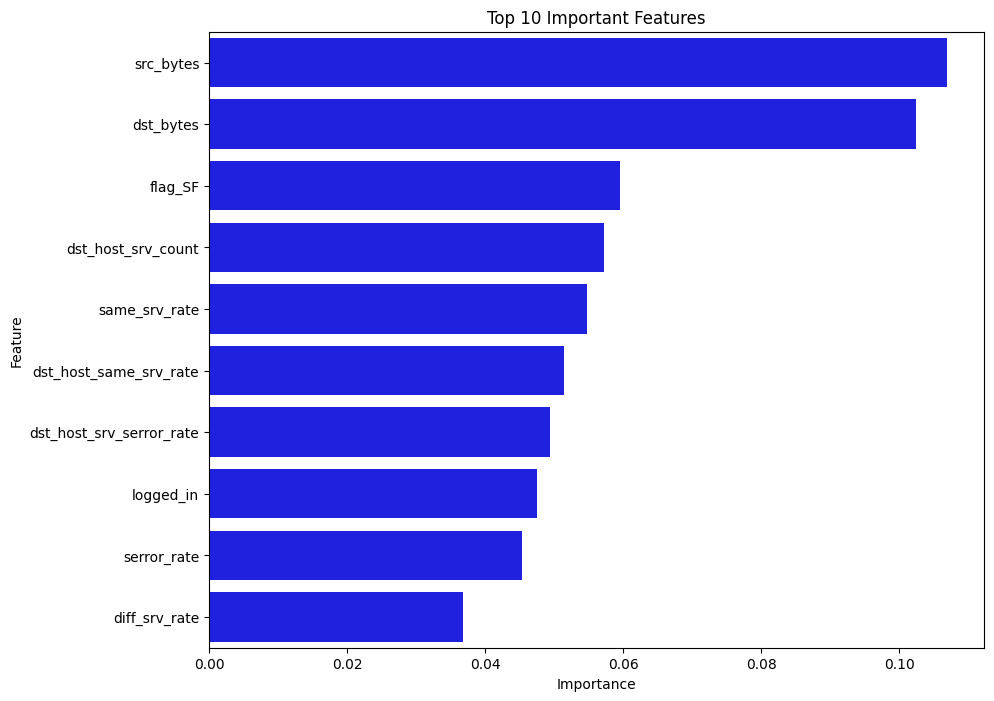

In [12]:
# Select top 10 features
top_10_features = feature_importances.head(10)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features, color='b')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Implementing MLP classifier in Python

In [13]:
# Create the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(70, 100), max_iter=1000, random_state=42)

# Train the MLP classifier
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(70, 100), max_iter=1000, random_state=42)

In [15]:
# Make predictions
y_pred = mlp.predict(X_test)

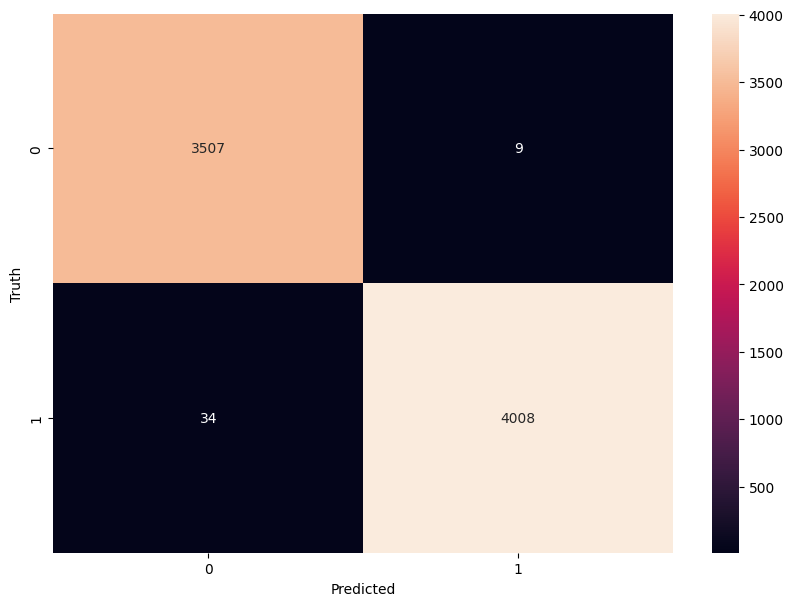

In [17]:
cm = confusion_matrix(y_test, y_pred)

# Use seaborn to plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [18]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.99      1.00      0.99      3516
      normal       1.00      0.99      0.99      4042

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558

Accuracy: 0.9943106641968775


In [19]:

# Calculate the probabilities of your predictions
y_pred_proba = mlp.predict_proba(X_test)[:,1]

# Map 'anomaly' to 1 and 'normal' to 0
y_test_binary = y_test.map({'anomaly': 1, 'normal': 0})

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test_binary, y_pred_proba)
print('AUC: ',roc_auc)


AUC:  0.0006942884693651816


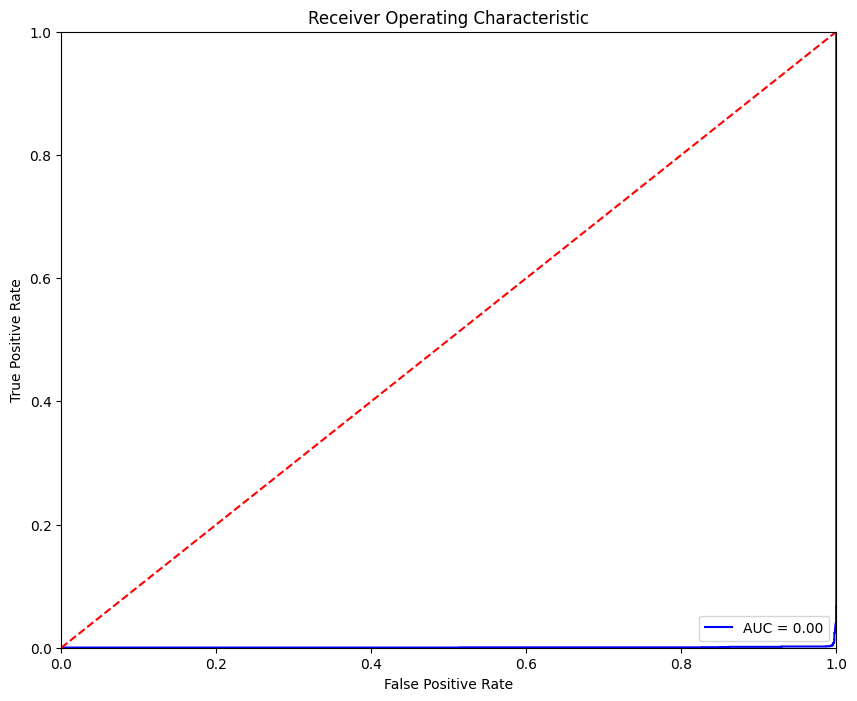

In [20]:
# Plot the ROC curve
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Error analysis

In [23]:
# Reset the index of y_test
y_test = y_test.reset_index(drop=True)

# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create masks for false positives and false negatives
fp_mask = (results['Actual'] == 'normal') & (results['Predicted'] == 'anomaly')
fn_mask = (results['Actual'] == 'anomaly') & (results['Predicted'] == 'normal')

# Convert X_test back into a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Analyze false positives
print(X_test_df[fp_mask].describe())

# Analyze false negatives
print(X_test_df[fn_mask].describe())

        duration  src_bytes  dst_bytes      land  wrong_fragment     urgent  \
count  34.000000  34.000000  34.000000  34.00000    3.400000e+01  34.000000   
mean    0.071531   0.036567   0.136200  -0.01065   -9.203543e-02  -0.007531   
std     1.090502   0.181486   0.720140   0.00000    1.408649e-17   0.000000   
min    -0.116532  -0.010490  -0.040988  -0.01065   -9.203543e-02  -0.007531   
25%    -0.116532  -0.010468  -0.040988  -0.01065   -9.203543e-02  -0.007531   
50%    -0.116532  -0.010422  -0.040988  -0.01065   -9.203543e-02  -0.007531   
75%    -0.116177  -0.009975  -0.038259  -0.01065   -9.203543e-02  -0.007531   
max     6.243154   0.751884   3.846391  -0.01065   -9.203543e-02  -0.007531   

             hot  num_failed_logins  logged_in  num_compromised  ...  \
count  34.000000       3.400000e+01  34.000000        34.000000  ...   
mean    2.217965      -2.659279e-02   0.280916        -0.006212  ...   
std     7.101858       3.521622e-18   1.037660         0.095669  ...   


## Anomaly analysis

In [26]:
# Convert X_test back into a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Print the description of anomalies
print(X_test_df[anomaly_mask].describe())



          duration    src_bytes    dst_bytes          land  wrong_fragment  \
count  3516.000000  3516.000000  3516.000000  3.516000e+03     3516.000000   
mean      0.013450    -0.007597     0.023872 -1.065036e-02        0.092817   
std       1.147453     0.067252     2.137443  1.734970e-18        1.405546   
min      -0.116532    -0.010490    -0.040988 -1.065036e-02       -0.092035   
25%      -0.116532    -0.010490    -0.040988 -1.065036e-02       -0.092035   
50%      -0.116532    -0.010490    -0.040988 -1.065036e-02       -0.092035   
75%      -0.116532    -0.010490    -0.040988 -1.065036e-02       -0.092035   
max      15.029062     1.773558    73.165919 -1.065036e-02       11.310443   

             urgent          hot  num_failed_logins    logged_in  \
count  3.516000e+03  3516.000000        3516.000000  3516.000000   
mean  -7.530727e-03    -0.041217           0.025274    -0.739306   
std    1.734970e-18     0.668576           1.914684     0.356605   
min   -7.530727e-03    -0

# Normal behaviour analysis

In [28]:

# Create a boolean mask for normal behavior
normal_mask = (y_test == 'normal')

# Print the description of normal instances
print(X_test_df[normal_mask].describe())


          duration    src_bytes    dst_bytes        land  wrong_fragment  \
count  4042.000000  4042.000000  4042.000000  4042.00000    4.042000e+03   
mean     -0.062607    -0.006093     0.033054    -0.01065   -9.203543e-02   
std       0.406131     0.066449     1.263117     0.00000    4.163851e-17   
min      -0.116532    -0.010490    -0.040988    -0.01065   -9.203543e-02   
25%      -0.116532    -0.010440    -0.039496    -0.01065   -9.203543e-02   
50%      -0.116532    -0.010408    -0.035360    -0.01065   -9.203543e-02   
75%      -0.116532    -0.010377    -0.010505    -0.01065   -9.203543e-02   
max       6.243154     2.507535    72.861503    -0.01065   -9.203543e-02   

             urgent          hot  num_failed_logins    logged_in  \
count  4.042000e+03  4042.000000        4042.000000  4042.000000   
mean  -7.530727e-03     0.020200           0.005634     0.675196   
std    1.734938e-18     1.196331           1.083814     0.917780   
min   -7.530727e-03    -0.094087          -